# Trees 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.feature_selection import f_classif
import itertools
import sys
import importlib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder
# from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis 
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer
from joblib import Parallel, delayed, parallel_backend
from threadpoolctl import threadpool_limits
import matplotlib.pylab as plt
import os
from sklearn.inspection import permutation_importance
from scipy.stats import norm, t
from sklearn.base import clone 
from sklearn.tree import DecisionTreeClassifier

sys.path.append("../")
from proj_mod import training
importlib.reload(training);

## Data importing

In [2]:
df=pd.read_csv("../data/raw.csv")
features=list(df.columns)[1:]
target=["Y"]
feat=df[features]
tar=df[target]
# x_t, x_v, y_t, y_v= train_test_split(feat,tar, test_size=0.2, random_state=0, stratify=tar["Y"])
n_splits=5

## For all raw features 

In [3]:
eva_pipe=Pipeline([("DataCreater", training.data_creator()),("DataSelector",training.data_selector())])
tar_arr=np.ravel(tar.values)
eva_pipe.fit(X=feat,y=tar)
eva_out=eva_pipe.transform(X=feat)
eva_out.columns

Index(['X1', 'X3', 'X5', 'X6', 'mean', 'F_w_mean', 'above_4', 'above_5'], dtype='object')

In [4]:
eva_pipe["DataSelector"].sel_

,features,f score,p value,X1,X2,X3,X4,X5,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873,0.607460,0.834641,0.266199,0.492355,0.604855,0.280160
2,X3,2.886959,0.091807,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750,0.676149,0.532371,0.442280,0.638649,0.481689,0.150838
4,X5,6.582716,0.011488,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195,0.712786,0.806779,0.491804,0.616787,0.586695,0.224522
5,X6,3.586849,0.060568,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000,0.540096,0.574523,0.261704,0.458477,0.490605,0.167669
6,mean,7.306094,0.007836,0.607460,0.426097,0.676149,0.557803,0.712786,0.540096,1.000000,0.869373,0.687659,0.848710,0.773920,0.235885
7,F_w_mean,12.615311,0.000542,0.834641,0.078909,0.532371,0.298662,0.806779,0.574523,0.869373,1.000000,0.498831,0.743851,0.761327,0.303878
9,above_4,7.194813,0.008308,0.492355,0.268810,0.638649,0.521454,0.616787,0.458477,0.848710,0.743851,0.465645,1.000000,0.546995,0.234181
10,above_5,6.520675,0.011874,0.604855,0.215269,0.481689,0.389949,0.586695,0.490605,0.773920,0.761327,0.229256,0.546995,1.000000,0.223515


In [5]:
eva_pipe["DataSelector"].total_

,features,f score,p value,X1,X2,X3,X4,X5,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873,0.607460,0.834641,0.266199,0.492355,0.604855,0.280160
1,X2,0.073108,0.787313,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205,0.426097,0.078909,0.500598,0.268810,0.215269,-0.024274
2,X3,2.886959,0.091807,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750,0.676149,0.532371,0.442280,0.638649,0.481689,0.150838
3,X4,0.516657,0.473623,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888,0.557803,0.298662,0.383442,0.521454,0.389949,0.064415
4,X5,6.582716,0.011488,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195,0.712786,0.806779,0.491804,0.616787,0.586695,0.224522
5,X6,3.586849,0.060568,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000,0.540096,0.574523,0.261704,0.458477,0.490605,0.167669
6,mean,7.306094,0.007836,0.607460,0.426097,0.676149,0.557803,0.712786,0.540096,1.000000,0.869373,0.687659,0.848710,0.773920,0.235885
7,F_w_mean,12.615311,0.000542,0.834641,0.078909,0.532371,0.298662,0.806779,0.574523,0.869373,1.000000,0.498831,0.743851,0.761327,0.303878
8,above_3,1.032794,0.311482,0.266199,0.500598,0.442280,0.383442,0.491804,0.261704,0.687659,0.498831,1.000000,0.465645,0.229256,0.090886
9,above_4,7.194813,0.008308,0.492355,0.268810,0.638649,0.521454,0.616787,0.458477,0.848710,0.743851,0.465645,1.000000,0.546995,0.234181


In [6]:
range_max_depth=range(1,6+1) # 2^6= 64, we only have 100 training data, so I would like to not have each leaf have too little data. 
range_feat_combin = training.all_combin(eva_out.columns)

n_split = 5
n_repeats = 20

RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)

splits = list(RSKF.split(X=feat, y=tar))

def evaluate_combo(list_f_sel_tuple, max_depth, splits, feat, tar):
    """
    Evaluate one (feature_set, n_neighbors) across all CV folds.
    
    :param list_f_sel_tuple: A tuple indicating a combination. 
    :param max_depth: The max_depth of the decision tree. 
    :param splits: A list of the pre generated splits. 
    :param feat: The feat df. 
    :param tar: The tar df. 
    :return: A dict with all the stats we want. 
    """
    list_f_sel = list(list_f_sel_tuple) 
    fold_acc = []
    fold_f1 = []

    for train_index, test_index in splits:
        x_tr, x_te = feat.iloc[train_index], feat.iloc[test_index]
        y_tr, y_te = tar.iloc[train_index], tar.iloc[test_index]

        y_tr = np.ravel(y_tr.values)
        y_te = np.ravel(y_te.values)
        

        pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelect", training.data_selector(force=list_f_sel)),
            ("DT", DecisionTreeClassifier(max_depth=max_depth))
        ])
            
        pipe.fit(X=x_tr, y=y_tr)
        y_p = pipe.predict(X=x_te)

        fold_acc.append(accuracy_score(y_true=y_te, y_pred=y_p))
        fold_f1.append(f1_score(y_true=y_te, y_pred=y_p))

    str_features = ",".join(list_f_sel)
    acc_mean = float(np.mean(fold_acc))
    acc_std  = float(np.std(fold_acc))
    f1_mean  = float(np.mean(fold_f1))
    f1_std   = float(np.std(fold_f1))
    above_73 = float((np.array(fold_acc) >= 0.73).sum() / (len(splits)))
    norm_above_73 = float(1-norm.cdf(0.73, loc=acc_mean, scale=acc_std))
    acc_mean_above_73 = float(1-norm.cdf(0.73, loc=acc_mean, scale=acc_std/np.sqrt(len(splits))))

    msg = (
        "_"*20 + "\n"
        + f"Currently used features {str_features} and max depth {max_depth}.\n"
        + f"This combo has f1 mean {f1_mean} and f1 std {f1_std}, \n"
        + f"with acc mean {acc_mean} acc std {acc_std}, "
        + f"and sureness of beating 73% {above_73}.\n"
        + "_"*20
    )

    return {
        #Hyper-parameters
        "features": str_features,
        "max_depth": max_depth,
        #Performance
        "acc_mean": acc_mean,
        "acc_std": acc_std,
        "f1_mean": f1_mean,
        "f1_std": f1_std,
        "above_73": above_73,
        "norm_above_73": norm_above_73,
        "acc_mean_above_73": acc_mean_above_73,
        #Log
        "log": msg,
    }

jobs = list(itertools.product(range_feat_combin, range_max_depth))

results = Parallel(n_jobs=-1, backend="loky", verbose=10)(
    delayed(evaluate_combo)(feat_sel, max_depth, splits, feat, tar)
    for feat_sel, max_depth in jobs
)

list_feat      = [r["features"] for r in results]
list_max_depth = [r["max_depth"] for r in results]
list_acc_mean  = [r["acc_mean"] for r in results]
list_acc_std   = [r["acc_std"] for r in results]
list_f1_mean   = [r["f1_mean"] for r in results]
list_f1_std    = [r["f1_std"] for r in results]
list_above_73  = [r["above_73"] for r in results]
list_norm_above_73 = [r["norm_above_73"] for r in results] 
list_acc_mean_above_73 = [r["acc_mean_above_73"] for r in results]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

In [7]:
df_results = pd.DataFrame({
    #Hyper-parameters
    "features": list_feat,
    "max_depth": list_max_depth,
    #Performances
    "acc_mean": list_acc_mean,
    "acc_std": list_acc_std,
    "f1_mean": list_f1_mean,
    "f1_std": list_f1_std,
    "above_73": list_above_73,
    "norm_above_73": list_norm_above_73, 
    "acc_mean_above_73": list_acc_mean_above_73
})

In [8]:
df_results.sort_values(by=["above_73"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
55,"X1,X5",2,0.662585,0.088865,0.651706,0.101472,0.24,0.224039,1.643130e-14
56,"X1,X5",3,0.656292,0.092366,0.673031,0.104301,0.23,0.212436,7.771561e-16
259,"X1,X5,mean",2,0.654985,0.087124,0.639545,0.107970,0.23,0.194613,0.000000e+00
299,"X1,X6,above_4",6,0.657646,0.096584,0.692288,0.100921,0.23,0.226890,3.408385e-14
277,"X1,X5,above_5",2,0.659077,0.090757,0.646544,0.108774,0.23,0.217265,2.775558e-15
...,...,...,...,...,...,...,...,...,...
46,above_5,5,0.540769,0.072830,0.562346,0.106940,0.00,0.004685,0.000000e+00
47,above_5,6,0.540769,0.072830,0.562346,0.106940,0.00,0.004685,0.000000e+00
8,X3,3,0.526646,0.068060,0.534121,0.097088,0.00,0.001405,0.000000e+00
7,X3,2,0.529708,0.070670,0.538678,0.095604,0.00,0.002297,0.000000e+00


In [9]:
df_results.sort_values(by=["f1_mean"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
296,"X1,X6,above_4",3,0.665677,0.078387,0.736353,0.076641,0.16,0.205941,1.110223e-16
734,"X1,X6,above_4,above_5",3,0.658569,0.076263,0.731562,0.074692,0.12,0.174472,0.000000e+00
656,"X1,X5,X6,above_4",3,0.659769,0.086857,0.728922,0.082939,0.20,0.209380,3.330669e-16
1124,"X1,X5,X6,above_4,above_5",3,0.653477,0.084357,0.723537,0.083627,0.17,0.182168,0.000000e+00
65,"X1,X6",6,0.655185,0.082393,0.719560,0.082094,0.18,0.181930,0.000000e+00
...,...,...,...,...,...,...,...,...,...
468,"X5,mean,above_5",1,0.502523,0.064440,0.483786,0.188152,0.00,0.000208,0.000000e+00
90,"X3,X5",1,0.520769,0.071565,0.483442,0.151757,0.00,0.001730,0.000000e+00
408,"X3,mean,above_5",1,0.505385,0.058106,0.481073,0.176552,0.00,0.000055,0.000000e+00
798,"X3,X5,mean,above_5",1,0.496985,0.060698,0.476568,0.179682,0.00,0.000062,0.000000e+00


In [10]:
df_results.sort_values(by=["acc_mean_above_73"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
599,"X1,X3,X6,above_4",6,0.661200,0.100885,0.683781,0.112188,0.22,0.247632,4.564238e-12
299,"X1,X6,above_4",6,0.657646,0.096584,0.692288,0.100921,0.23,0.226890,3.408385e-14
55,"X1,X5",2,0.662585,0.088865,0.651706,0.101472,0.24,0.224039,1.643130e-14
277,"X1,X5,above_5",2,0.659077,0.090757,0.646544,0.108774,0.23,0.217265,2.775558e-15
298,"X1,X6,above_4",5,0.655846,0.093912,0.693330,0.101857,0.20,0.214879,1.443290e-15
...,...,...,...,...,...,...,...,...,...
508,"X6,mean,above_5",5,0.514554,0.089021,0.568607,0.116911,0.01,0.007756,0.000000e+00
507,"X6,mean,above_5",4,0.514862,0.081482,0.589743,0.110465,0.00,0.004141,0.000000e+00
506,"X6,mean,above_5",3,0.518908,0.081538,0.605642,0.115544,0.00,0.004814,0.000000e+00
505,"X6,mean,above_5",2,0.536692,0.067721,0.635513,0.111950,0.00,0.002155,0.000000e+00


In [11]:
df_results.sort_values(by=["acc_mean"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
296,"X1,X6,above_4",3,0.665677,0.078387,0.736353,0.076641,0.16,0.205941,1.110223e-16
55,"X1,X5",2,0.662585,0.088865,0.651706,0.101472,0.24,0.224039,1.643130e-14
599,"X1,X3,X6,above_4",6,0.661200,0.100885,0.683781,0.112188,0.22,0.247632,4.564238e-12
656,"X1,X5,X6,above_4",3,0.659769,0.086857,0.728922,0.082939,0.20,0.209380,3.330669e-16
657,"X1,X5,X6,above_4",4,0.659215,0.087289,0.710651,0.085692,0.20,0.208705,2.220446e-16
...,...,...,...,...,...,...,...,...,...
136,"X5,mean",5,0.498277,0.077998,0.518480,0.133332,0.00,0.001485,0.000000e+00
353,"X3,X5,mean",6,0.497323,0.084501,0.541004,0.120607,0.00,0.002948,0.000000e+00
798,"X3,X5,mean,above_5",1,0.496985,0.060698,0.476568,0.179682,0.00,0.000062,0.000000e+00
352,"X3,X5,mean",5,0.495215,0.083957,0.516506,0.133023,0.00,0.002583,0.000000e+00


In [13]:
df_results.to_csv("../data/DT_results_exhaust_raw6.csv", index=False)

I prefer 599 the most. 

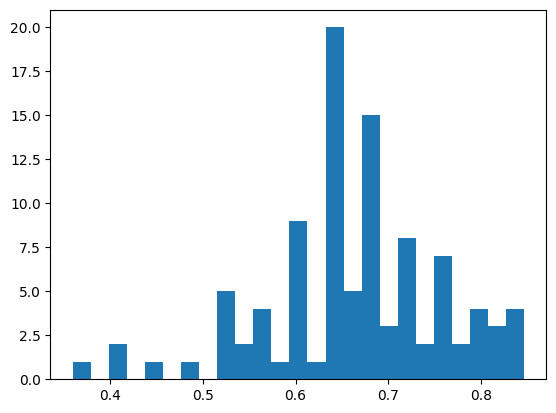

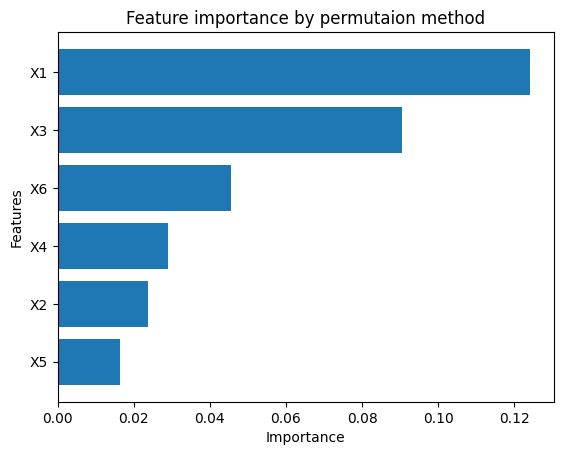

[[0.28233846 0.16996923]
 [0.16998462 0.37770769]]


In [ ]:
#599
n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat, y=tar))
pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelect", training.data_selector(force=["X1","X3","X6","above_4"])),
            ("DT", DecisionTreeClassifier(max_depth=6))
        ])
training.show_result(splits=splits,pipe=pipe,feat=feat,tar=tar)

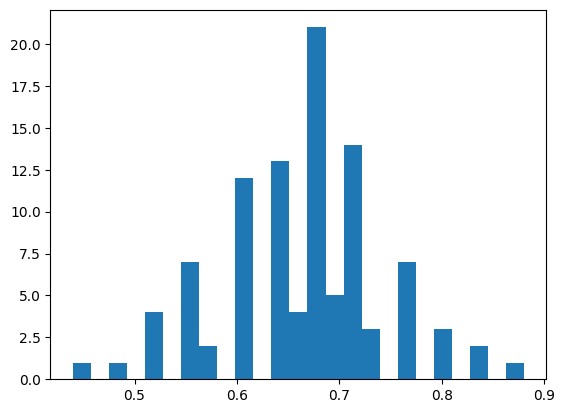

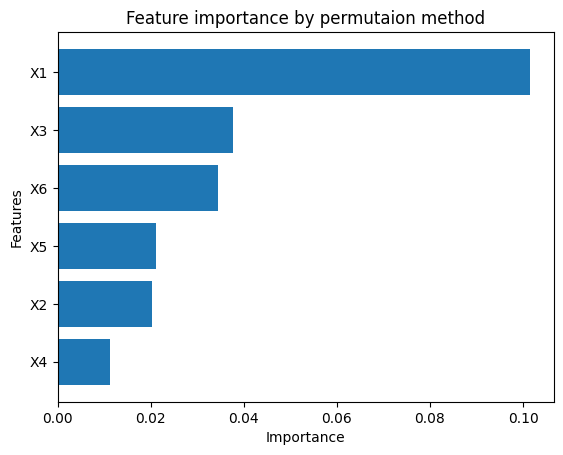

[[0.19038462 0.26192308]
 [0.0724     0.47529231]]


In [6]:
#296
n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat, y=tar))
pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelect", training.data_selector(force=["X1","X6","above_4"])),
            ("DT", DecisionTreeClassifier(max_depth=3))
        ])
training.show_result(splits=splits,pipe=pipe,feat=feat,tar=tar)

Interesting, might investigate further later. It is unclear if we should remove X4 or X5 first, we will do both and see which one does best and go from there. From past experience with KNN, X5 might be the better one, but we can never know until we try it. 

## With 5 raw features (removing X5) 

In [7]:
df=pd.read_csv("../data/raw.csv")
features=[feature for feature in list(df.columns)[1:] if feature not in ["X5"]]
target=["Y"]
feat5=df[features]
tar=df[target]
# x_t, x_v, y_t, y_v= train_test_split(feat,tar, test_size=0.2, random_state=0, stratify=tar["Y"])
n_splits=5

eva_pipe=Pipeline([("DataCreater", training.data_creator()),("DataSelector",training.data_selector())])
tar_arr=np.ravel(tar.values)
eva_pipe.fit(X=feat5,y=tar)
eva_out=eva_pipe.transform(X=feat5)
eva_out.columns

Index(['X1', 'X3', 'X6', 'mean', 'F_w_mean', 'above_4', 'above_5'], dtype='object')

In [8]:
eva_pipe["DataSelector"].sel_

,features,f score,p value,X1,X2,X3,X4,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.059797,0.283358,0.087541,0.411873,0.579958,0.927532,0.159563,0.452574,0.638802,0.280160
2,X3,2.886959,0.091807,0.283358,0.184129,1.000000,0.302618,0.203750,0.697923,0.536801,0.454106,0.617900,0.456654,0.150838
4,X6,3.586849,0.060568,0.411873,-0.062205,0.203750,0.215888,1.000000,0.543082,0.623621,0.167169,0.460631,0.542108,0.167669
5,mean,5.232238,0.023866,0.579958,0.518779,0.697923,0.576851,0.543082,1.000000,0.779106,0.632114,0.822238,0.738077,0.201214
6,F_w_mean,11.656038,0.000865,0.927532,0.088304,0.536801,0.239871,0.623621,0.779106,1.000000,0.297903,0.639125,0.750639,0.293127
8,above_4,5.335200,0.022552,0.452574,0.352759,0.617900,0.525962,0.460631,0.822238,0.639125,0.363043,1.000000,0.484418,0.203103
9,above_5,5.867469,0.016870,0.638802,0.200652,0.456654,0.403027,0.542108,0.738077,0.750639,0.129994,0.484418,1.000000,0.212557


In [9]:
eva_pipe["DataSelector"].total_

,features,f score,p value,X1,X2,X3,X4,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.059797,0.283358,0.087541,0.411873,0.579958,0.927532,0.159563,0.452574,0.638802,0.280160
1,X2,0.073108,0.787313,0.059797,1.000000,0.184129,0.114838,-0.062205,0.518779,0.088304,0.607683,0.352759,0.200652,-0.024274
2,X3,2.886959,0.091807,0.283358,0.184129,1.000000,0.302618,0.203750,0.697923,0.536801,0.454106,0.617900,0.456654,0.150838
3,X4,0.516657,0.473623,0.087541,0.114838,0.302618,1.000000,0.215888,0.576851,0.239871,0.345254,0.525962,0.403027,0.064415
4,X6,3.586849,0.060568,0.411873,-0.062205,0.203750,0.215888,1.000000,0.543082,0.623621,0.167169,0.460631,0.542108,0.167669
5,mean,5.232238,0.023866,0.579958,0.518779,0.697923,0.576851,0.543082,1.000000,0.779106,0.632114,0.822238,0.738077,0.201214
6,F_w_mean,11.656038,0.000865,0.927532,0.088304,0.536801,0.239871,0.623621,0.779106,1.000000,0.297903,0.639125,0.750639,0.293127
7,above_3,0.113470,0.736797,0.159563,0.607683,0.454106,0.345254,0.167169,0.632114,0.297903,1.000000,0.363043,0.129994,0.030236
8,above_4,5.335200,0.022552,0.452574,0.352759,0.617900,0.525962,0.460631,0.822238,0.639125,0.363043,1.000000,0.484418,0.203103
9,above_5,5.867469,0.016870,0.638802,0.200652,0.456654,0.403027,0.542108,0.738077,0.750639,0.129994,0.484418,1.000000,0.212557


In [12]:
range_max_depth=range(1,6+1) 
range_feat5_combin = training.all_combin(eva_out.columns)

n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat5, y=tar))

pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelector", training.data_selector()),
            ("DT", DecisionTreeClassifier())
        ])

jobs5 = list(itertools.product(range_feat5_combin, range_max_depth))

In [13]:
results = Parallel(n_jobs=-1, backend="loky", verbose=10)(
    delayed(training.evaluate_combo)(
        list_f_sel_tuple=feat_sel, 
        dict_param={"DT__max_depth": max_depth}, 
        splits=splits, 
        pipe=pipe, 
        feat=feat5, 
        tar=tar 
    )
    for feat_sel, max_depth in jobs5
)

list_feat      = [r["features"] for r in results]
list_mx_depth  = [r["DT__max_depth"] for r in results] 
list_acc_mean  = [r["acc_mean"] for r in results]
list_acc_std   = [r["acc_std"] for r in results]
list_f1_mean   = [r["f1_mean"] for r in results]
list_f1_std    = [r["f1_std"] for r in results]
list_above_73  = [r["above_73"] for r in results]
list_norm_above_73 = [r["norm_above_73"] for r in results] 
list_acc_mean_above_73 = [r["acc_mean_above_73"] for r in results]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

In [15]:
df_results = pd.DataFrame({
    #Hyper-parameters
    "features": list_feat,
    "max_depth": list_mx_depth,
    #Performances
    "acc_mean": list_acc_mean,
    "acc_std": list_acc_std,
    "f1_mean": list_f1_mean,
    "f1_std": list_f1_std,
    "above_73": list_above_73,
    "norm_above_73": list_norm_above_73, 
    "acc_mean_above_73": list_acc_mean_above_73
})

In [16]:
df_results.to_csv("../data/DT_results_exhaust_raw5X5.csv", index=False)

In [17]:
df_results.sort_values(by=["acc_mean_above_73"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
215,"X1,X6,above_4",6,0.673369,0.089024,0.706092,0.091076,0.24,0.262346,1.000231e-10
71,"X1,above_4",6,0.672646,0.082064,0.721256,0.082305,0.26,0.242310,1.385114e-12
70,"X1,above_4",5,0.672246,0.080551,0.721195,0.077820,0.25,0.236692,3.753664e-13
221,"X1,X6,above_5",6,0.664323,0.086755,0.722852,0.083860,0.20,0.224513,1.865175e-14
209,"X1,X6,F_w_mean",6,0.660031,0.090262,0.689618,0.092124,0.18,0.219118,4.551914e-15
...,...,...,...,...,...,...,...,...,...
262,"X3,X6,mean",5,0.525877,0.082255,0.593044,0.115684,0.02,0.006540,0.000000e+00
263,"X3,X6,mean",6,0.534615,0.088026,0.591014,0.116530,0.01,0.013222,0.000000e+00
264,"X3,X6,F_w_mean",1,0.596015,0.076764,0.549542,0.119005,0.04,0.040457,0.000000e+00
265,"X3,X6,F_w_mean",2,0.581323,0.070267,0.558585,0.113437,0.01,0.017177,0.000000e+00


In [18]:
df_results.sort_values(by=["f1_mean"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
30,above_4,1,0.622815,0.055313,0.733678,0.043865,0.01,0.026325,0.0
68,"X1,above_4",3,0.665477,0.073040,0.730945,0.064733,0.19,0.188513,0.0
212,"X1,X6,above_4",3,0.656446,0.076534,0.730210,0.072455,0.15,0.168261,0.0
138,"mean,above_4",1,0.616815,0.055582,0.730124,0.044869,0.01,0.020857,0.0
96,"X3,above_4",1,0.620415,0.056243,0.728798,0.060196,0.01,0.025683,0.0
...,...,...,...,...,...,...,...,...,...
298,"X3,mean,above_5",5,0.483723,0.075983,0.506623,0.135638,0.00,0.000595,0.0
104,"X3,above_5",3,0.510523,0.079662,0.501722,0.098969,0.01,0.002934,0.0
107,"X3,above_5",6,0.530138,0.081958,0.501085,0.108243,0.00,0.007372,0.0
106,"X3,above_5",5,0.520938,0.073664,0.500943,0.103888,0.00,0.002270,0.0


In [19]:
df_results.sort_values(by=["acc_mean"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
215,"X1,X6,above_4",6,0.673369,0.089024,0.706092,0.091076,0.24,0.262346,1.000231e-10
71,"X1,above_4",6,0.672646,0.082064,0.721256,0.082305,0.26,0.242310,1.385114e-12
70,"X1,above_4",5,0.672246,0.080551,0.721195,0.077820,0.25,0.236692,3.753664e-13
68,"X1,above_4",3,0.665477,0.073040,0.730945,0.064733,0.19,0.188513,0.000000e+00
221,"X1,X6,above_5",6,0.664323,0.086755,0.722852,0.083860,0.20,0.224513,1.865175e-14
...,...,...,...,...,...,...,...,...,...
88,"X3,mean",5,0.484062,0.071665,0.527684,0.105035,0.00,0.000300,0.000000e+00
298,"X3,mean,above_5",5,0.483723,0.075983,0.506623,0.135638,0.00,0.000595,0.000000e+00
89,"X3,mean",6,0.479292,0.076208,0.511549,0.113289,0.00,0.000501,0.000000e+00
22,mean,5,0.470169,0.075607,0.582551,0.092682,0.00,0.000295,0.000000e+00


We have two candidates: 212, 215. 

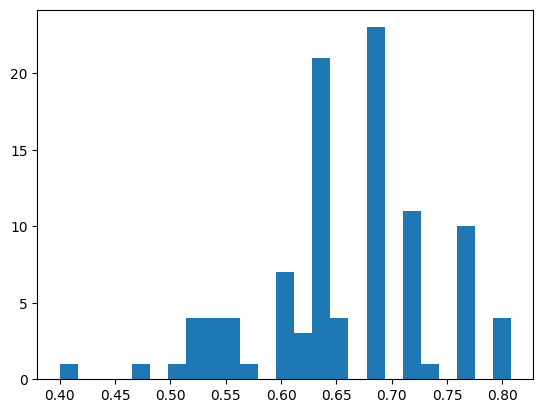

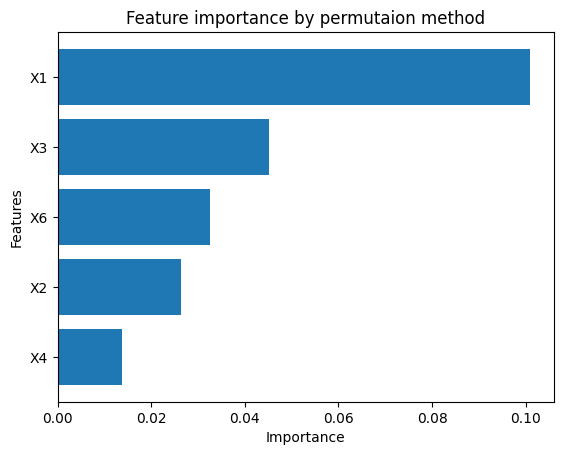

[[0.1846     0.26770769]
 [0.07544615 0.47224615]]


In [20]:
#212
n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat5, y=tar))
pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelect", training.data_selector(force=["X1","X6","above_4"])),
            ("DT", DecisionTreeClassifier(max_depth=3))
        ])
training.show_result(splits=splits,pipe=pipe,feat=feat5,tar=tar)

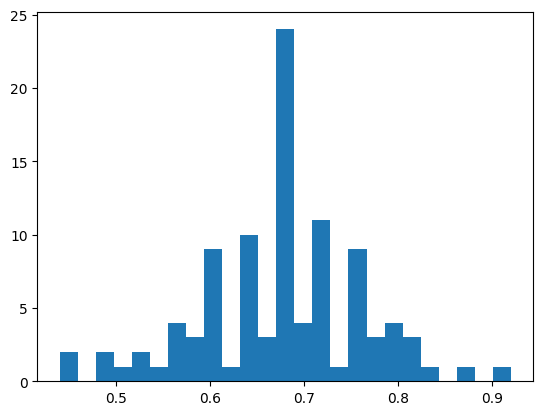

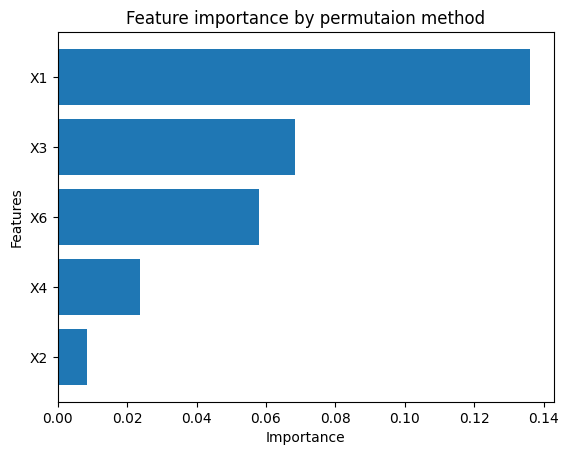

[[0.27341538 0.17889231]
 [0.14693846 0.40075385]]


In [21]:
#215
n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat5, y=tar))
pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelect", training.data_selector(force=["X1","X6","above_4"])),
            ("DT", DecisionTreeClassifier(max_depth=6))
        ])
training.show_result(splits=splits,pipe=pipe,feat=feat5,tar=tar)

Great now we are not sure X2 or X4 which one should go first, I am going to go with X2, since I like 215 better. 

## With 4 raw features (removing X5 X2) 

In [52]:
df=pd.read_csv("../data/raw.csv")
features=[feature for feature in list(df.columns)[1:] if feature not in ["X5", "X2"]]
target=["Y"]
feat4=df[features]
tar=df[target]
# x_t, x_v, y_t, y_v= train_test_split(feat,tar, test_size=0.2, random_state=0, stratify=tar["Y"])
n_splits=5

eva_pipe=Pipeline([("DataCreater", training.data_creator()),("DataSelector",training.data_selector())])
tar_arr=np.ravel(tar.values)
eva_pipe.fit(X=feat4,y=tar)
eva_out=eva_pipe.transform(X=feat4)
eva_out.columns

Index(['X1', 'X3', 'X6', 'mean', 'F_w_mean', 'above_4', 'above_5'], dtype='object')

In [35]:
eva_pipe["DataSelector"].sel_

,features,f score,p value,X1,X3,X4,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.283358,0.087541,0.411873,0.644577,0.927667,0.231846,0.479340,0.655442,0.280160
1,X3,2.886959,0.091807,0.283358,1.000000,0.302618,0.203750,0.721947,0.535804,0.596516,0.596721,0.459397,0.150838
3,X6,3.586849,0.060568,0.411873,0.203750,0.215888,1.000000,0.660221,0.624448,0.276371,0.536913,0.590135,0.167669
4,mean,7.932315,0.005652,0.644577,0.721947,0.614600,0.660221,1.000000,0.861734,0.581153,0.824001,0.792675,0.245202
5,F_w_mean,11.686770,0.000852,0.927667,0.535804,0.239192,0.624448,0.861734,1.000000,0.413995,0.672209,0.775947,0.293480
7,above_4,8.209137,0.004897,0.479340,0.596721,0.558168,0.536913,0.824001,0.672209,0.340219,1.000000,0.470942,0.249183
8,above_5,6.120351,0.014716,0.655442,0.459397,0.425359,0.590135,0.792675,0.775947,0.180561,0.470942,1.000000,0.216878


In [36]:
eva_pipe["DataSelector"].total_

,features,f score,p value,X1,X3,X4,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.283358,0.087541,0.411873,0.644577,0.927667,0.231846,0.479340,0.655442,0.280160
1,X3,2.886959,0.091807,0.283358,1.000000,0.302618,0.203750,0.721947,0.535804,0.596516,0.596721,0.459397,0.150838
2,X4,0.516657,0.473623,0.087541,0.302618,1.000000,0.215888,0.614600,0.239192,0.379960,0.558168,0.425359,0.064415
3,X6,3.586849,0.060568,0.411873,0.203750,0.215888,1.000000,0.660221,0.624448,0.276371,0.536913,0.590135,0.167669
4,mean,7.932315,0.005652,0.644577,0.721947,0.614600,0.660221,1.000000,0.861734,0.581153,0.824001,0.792675,0.245202
5,F_w_mean,11.686770,0.000852,0.927667,0.535804,0.239192,0.624448,0.861734,1.000000,0.413995,0.672209,0.775947,0.293480
6,above_3,1.002803,0.318583,0.231846,0.596516,0.379960,0.276371,0.581153,0.413995,1.000000,0.340219,0.180561,0.089567
7,above_4,8.209137,0.004897,0.479340,0.596721,0.558168,0.536913,0.824001,0.672209,0.340219,1.000000,0.470942,0.249183
8,above_5,6.120351,0.014716,0.655442,0.459397,0.425359,0.590135,0.792675,0.775947,0.180561,0.470942,1.000000,0.216878


In [ ]:
range_max_depth=range(1,6+1) 
range_feat4_combin = training.all_combin(eva_out.columns)

n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat4, y=tar))

pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelector", training.data_selector()),
            ("DT", DecisionTreeClassifier())
        ])

jobs4 = list(itertools.product(range_feat4_combin, range_max_depth))

In [38]:
results = Parallel(n_jobs=-1, backend="loky", verbose=10)(
    delayed(training.evaluate_combo)(
        list_f_sel_tuple=feat_sel, 
        dict_param={"DT__max_depth": max_depth}, 
        splits=splits, 
        pipe=pipe, 
        feat=feat4, 
        tar=tar 
    )
    for feat_sel, max_depth in jobs4
)

list_feat      = [r["features"] for r in results]
list_max_depth  = [r["DT__max_depth"] for r in results] 
list_acc_mean  = [r["acc_mean"] for r in results]
list_acc_std   = [r["acc_std"] for r in results]
list_f1_mean   = [r["f1_mean"] for r in results]
list_f1_std    = [r["f1_std"] for r in results]
list_above_73  = [r["above_73"] for r in results]
list_norm_above_73 = [r["norm_above_73"] for r in results] 
list_acc_mean_above_73 = [r["acc_mean_above_73"] for r in results]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

In [39]:
df_results = pd.DataFrame({
    #Hyper-parameters
    "features": list_feat,
    "max_depth": list_max_depth,
    #Performances
    "acc_mean": list_acc_mean,
    "acc_std": list_acc_std,
    "f1_mean": list_f1_mean,
    "f1_std": list_f1_std,
    "above_73": list_above_73,
    "norm_above_73": list_norm_above_73, 
    "acc_mean_above_73": list_acc_mean_above_73
})

In [40]:
df_results.to_csv("../data/DT_results_exhaust_raw4X52.csv", index=False)

In [41]:
df_results.sort_values(by=["acc_mean_above_73"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
203,"X1,X6,mean",6,0.719800,0.084761,0.740208,0.092712,0.43,0.452108,0.114414
455,"X1,X6,mean,above_5",6,0.701508,0.085151,0.724863,0.090785,0.33,0.368960,0.000410
239,"X1,mean,above_5",6,0.701508,0.083240,0.712756,0.097041,0.35,0.366066,0.000310
215,"X1,X6,above_4",6,0.703000,0.077468,0.733803,0.073929,0.34,0.363721,0.000246
449,"X1,X6,mean,above_4",6,0.699508,0.087063,0.721549,0.091568,0.32,0.363082,0.000231
...,...,...,...,...,...,...,...,...,...
273,"X3,X6,above_4",4,0.570200,0.076115,0.631404,0.081747,0.01,0.017889,0.000000
274,"X3,X6,above_4",5,0.578523,0.071258,0.626708,0.081371,0.01,0.016762,0.000000
275,"X3,X6,above_4",6,0.602785,0.087924,0.641500,0.087927,0.11,0.073966,0.000000
276,"X3,X6,above_5",1,0.532031,0.053659,0.651049,0.098904,0.00,0.000112,0.000000


In [ ]:
df_results.sort_values(by=["f1_mean"], ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
203,"X1,X6,mean",6,0.719800,0.084761,0.740208,0.092712,0.43,0.452108,0.114414
215,"X1,X6,above_4",6,0.703000,0.077468,0.733803,0.073929,0.34,0.363721,0.000246
455,"X1,X6,mean,above_5",6,0.701508,0.085151,0.724863,0.090785,0.33,0.368960,0.000410
449,"X1,X6,mean,above_4",6,0.699508,0.087063,0.721549,0.091568,0.32,0.363082,0.000231
52,"X1,X6",5,0.655185,0.082393,0.719560,0.082094,0.18,0.181930,0.000000
...,...,...,...,...,...,...,...,...,...
9,X3,4,0.526646,0.068060,0.534121,0.097088,0.00,0.001405,0.000000
107,"X3,above_5",6,0.550631,0.087752,0.525631,0.112631,0.03,0.020475,0.000000
106,"X3,above_5",5,0.538031,0.082835,0.514064,0.107403,0.02,0.010239,0.000000
105,"X3,above_5",4,0.524400,0.086854,0.513313,0.107764,0.02,0.008962,0.000000


In [55]:
df_results.sort_values(by=["acc_mean"], ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
203,"X1,X6,mean",6,0.719800,0.084761,0.740208,0.092712,0.43,0.452108,0.114414
215,"X1,X6,above_4",6,0.703000,0.077468,0.733803,0.073929,0.34,0.363721,0.000246
239,"X1,mean,above_5",6,0.701508,0.083240,0.712756,0.097041,0.35,0.366066,0.000310
455,"X1,X6,mean,above_5",6,0.701508,0.085151,0.724863,0.090785,0.33,0.368960,0.000410
449,"X1,X6,mean,above_4",6,0.699508,0.087063,0.721549,0.091568,0.32,0.363082,0.000231
...,...,...,...,...,...,...,...,...,...
102,"X3,above_5",1,0.526169,0.048409,0.651015,0.109475,0.00,0.000013,0.000000
105,"X3,above_5",4,0.524400,0.086854,0.513313,0.107764,0.02,0.008962,0.000000
350,"X6,above_4,above_5",3,0.521462,0.069198,0.614793,0.079396,0.00,0.001291,0.000000
103,"X3,above_5",2,0.512969,0.063131,0.553811,0.099155,0.00,0.000293,0.000000


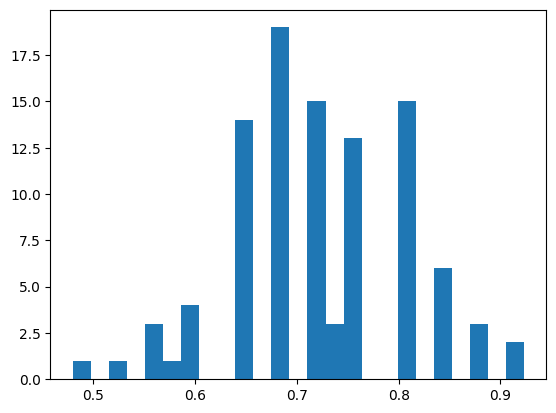

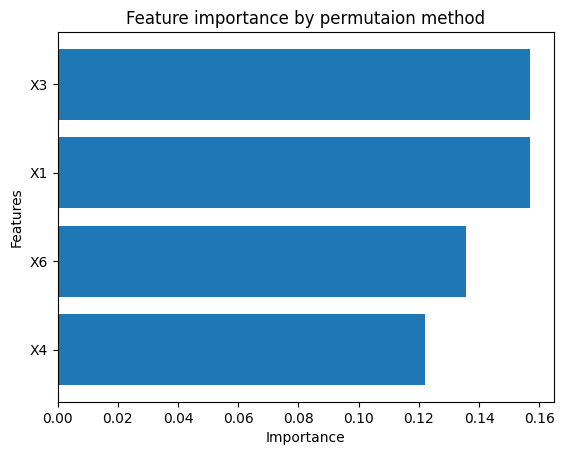

[[0.31272308 0.13958462]
 [0.13943077 0.40826154]]


In [53]:
#203
n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat4, y=tar))
pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelect", training.data_selector(force=["X1","X6","mean"])),
            ("DT", DecisionTreeClassifier(max_depth=6))
        ])
training.show_result(splits=splits,pipe=pipe,feat=feat4,tar=tar)

All the raw features are quite important, I do not think further removing X4 can help. I will further remove X4 just for the sanity check. 

## With 3 raw features (removing X5 X2 X4) 

In [56]:
df=pd.read_csv("../data/raw.csv")
features=[feature for feature in list(df.columns)[1:] if feature not in ["X5", "X2", "X4"]]
target=["Y"]
feat3=df[features]
tar=df[target]
# x_t, x_v, y_t, y_v= train_test_split(feat,tar, test_size=0.2, random_state=0, stratify=tar["Y"])
n_splits=5

eva_pipe=Pipeline([("DataCreater", training.data_creator()),("DataSelector",training.data_selector())])
tar_arr=np.ravel(tar.values)
eva_pipe.fit(X=feat3,y=tar)
eva_out=eva_pipe.transform(X=feat3)
eva_out.columns

Index(['X1', 'X3', 'X6', 'mean', 'F_w_mean', 'above_4', 'above_5'], dtype='object')

In [57]:
eva_pipe["DataSelector"].sel_

,features,f score,p value,X1,X3,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.283358,0.411873,0.742239,0.932366,0.254083,0.572642,0.738850,0.280160
1,X3,2.886959,0.091807,0.283358,1.000000,0.203750,0.737905,0.528374,0.711903,0.627609,0.417503,0.150838
2,X6,3.586849,0.060568,0.411873,0.203750,1.000000,0.702607,0.621294,0.207669,0.596401,0.671972,0.167669
3,mean,9.606472,0.002400,0.742239,0.737905,0.702607,1.000000,0.933172,0.573588,0.825558,0.814657,0.268144
4,F_w_mean,11.687517,0.000852,0.932366,0.528374,0.621294,0.933172,1.000000,0.431670,0.749302,0.838511,0.293489
6,above_4,9.943270,0.002025,0.572642,0.627609,0.596401,0.825558,0.749302,0.340390,1.000000,0.516190,0.272461
7,above_5,7.296431,0.007876,0.738850,0.417503,0.671972,0.814657,0.838511,0.173275,0.516190,1.000000,0.235738


In [58]:
eva_pipe["DataSelector"].total_

,features,f score,p value,X1,X3,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.283358,0.411873,0.742239,0.932366,0.254083,0.572642,0.738850,0.280160
1,X3,2.886959,0.091807,0.283358,1.000000,0.203750,0.737905,0.528374,0.711903,0.627609,0.417503,0.150838
2,X6,3.586849,0.060568,0.411873,0.203750,1.000000,0.702607,0.621294,0.207669,0.596401,0.671972,0.167669
3,mean,9.606472,0.002400,0.742239,0.737905,0.702607,1.000000,0.933172,0.573588,0.825558,0.814657,0.268144
4,F_w_mean,11.687517,0.000852,0.932366,0.528374,0.621294,0.933172,1.000000,0.431670,0.749302,0.838511,0.293489
5,above_3,0.783510,0.377783,0.254083,0.711903,0.207669,0.573588,0.431670,1.000000,0.340390,0.173275,0.079240
6,above_4,9.943270,0.002025,0.572642,0.627609,0.596401,0.825558,0.749302,0.340390,1.000000,0.516190,0.272461
7,above_5,7.296431,0.007876,0.738850,0.417503,0.671972,0.814657,0.838511,0.173275,0.516190,1.000000,0.235738


In [59]:
range_max_depth=range(1,6+1) 
range_feat3_combin = training.all_combin(eva_out.columns)

n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat3, y=tar))

pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelector", training.data_selector()),
            ("DT", DecisionTreeClassifier())
        ])

jobs3 = list(itertools.product(range_feat3_combin, range_max_depth))

In [60]:
results = Parallel(n_jobs=-1, backend="loky", verbose=10)(
    delayed(training.evaluate_combo)(
        list_f_sel_tuple=feat_sel, 
        dict_param={"DT__max_depth": max_depth}, 
        splits=splits, 
        pipe=pipe, 
        feat=feat3, 
        tar=tar 
    )
    for feat_sel, max_depth in jobs3
)

list_feat      = [r["features"] for r in results]
list_max_depth  = [r["DT__max_depth"] for r in results] 
list_acc_mean  = [r["acc_mean"] for r in results]
list_acc_std   = [r["acc_std"] for r in results]
list_f1_mean   = [r["f1_mean"] for r in results]
list_f1_std    = [r["f1_std"] for r in results]
list_above_73  = [r["above_73"] for r in results]
list_norm_above_73 = [r["norm_above_73"] for r in results] 
list_acc_mean_above_73 = [r["acc_mean_above_73"] for r in results]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

In [61]:
df_results = pd.DataFrame({
    #Hyper-parameters
    "features": list_feat,
    "max_depth": list_max_depth,
    #Performances
    "acc_mean": list_acc_mean,
    "acc_std": list_acc_std,
    "f1_mean": list_f1_mean,
    "f1_std": list_f1_std,
    "above_73": list_above_73,
    "norm_above_73": list_norm_above_73, 
    "acc_mean_above_73": list_acc_mean_above_73
})

In [62]:
df_results.to_csv("../data/DT_results_exhaust_raw3X524.csv", index=False)

In [63]:
df_results.sort_values(by=["acc_mean_above_73"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
659,"X1,X6,mean,F_w_mean,above_5",6,0.669677,0.094239,0.715656,0.096966,0.23,0.261051,7.713896e-11
443,"X1,X6,mean,F_w_mean",6,0.671692,0.091029,0.716864,0.093254,0.24,0.260910,7.498335e-11
197,"X1,X3,above_5",6,0.669015,0.090595,0.712984,0.092327,0.22,0.250424,8.392953e-12
467,"X1,X6,F_w_mean,above_5",6,0.663415,0.095156,0.711341,0.098018,0.22,0.242045,1.303957e-12
209,"X1,X6,F_w_mean",6,0.665062,0.090556,0.712159,0.095677,0.19,0.236653,3.720357e-13
...,...,...,...,...,...,...,...,...,...
263,"X3,X6,mean",6,0.579446,0.082264,0.636173,0.097422,0.03,0.033615,0.000000e+00
264,"X3,X6,F_w_mean",1,0.573354,0.073330,0.547638,0.132806,0.01,0.016333,0.000000e+00
265,"X3,X6,F_w_mean",2,0.561000,0.066261,0.582314,0.123132,0.01,0.005378,0.000000e+00
266,"X3,X6,F_w_mean",3,0.585954,0.078323,0.620062,0.110721,0.05,0.032948,0.000000e+00


In [64]:
df_results.sort_values(by=["f1_mean"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
220,"X1,X6,above_5",5,0.667123,0.081956,0.735713,0.074161,0.21,0.221479,8.437695e-15
221,"X1,X6,above_5",6,0.666308,0.083009,0.734882,0.074716,0.19,0.221453,8.437695e-15
219,"X1,X6,above_5",4,0.655954,0.083339,0.724689,0.083366,0.15,0.187136,0.000000e+00
52,"X1,X6",5,0.655185,0.082393,0.719560,0.082094,0.18,0.181930,0.000000e+00
53,"X1,X6",6,0.655185,0.082393,0.719560,0.082094,0.18,0.181930,0.000000e+00
...,...,...,...,...,...,...,...,...,...
510,"X3,X6,mean,above_5",1,0.554600,0.066162,0.476128,0.147339,0.00,0.004012,0.000000e+00
144,"mean,above_5",1,0.560969,0.064619,0.469119,0.144156,0.00,0.004451,0.000000e+00
294,"X3,mean,above_5",1,0.560969,0.064619,0.469119,0.144156,0.00,0.004451,0.000000e+00
18,mean,1,0.563369,0.065523,0.468953,0.144014,0.00,0.005494,0.000000e+00


In [65]:
df_results.sort_values(by=["acc_mean"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
443,"X1,X6,mean,F_w_mean",6,0.671692,0.091029,0.716864,0.093254,0.24,0.260910,7.498335e-11
659,"X1,X6,mean,F_w_mean,above_5",6,0.669677,0.094239,0.715656,0.096966,0.23,0.261051,7.713896e-11
197,"X1,X3,above_5",6,0.669015,0.090595,0.712984,0.092327,0.22,0.250424,8.392953e-12
220,"X1,X6,above_5",5,0.667123,0.081956,0.735713,0.074161,0.21,0.221479,8.437695e-15
569,"X6,mean,F_w_mean,above_5",6,0.666954,0.083872,0.711691,0.088799,0.21,0.226116,2.797762e-14
...,...,...,...,...,...,...,...,...,...
110,"X6,mean",3,0.529354,0.067445,0.576295,0.082162,0.00,0.001465,0.000000e+00
10,X3,5,0.526646,0.068060,0.534121,0.097088,0.00,0.001405,0.000000e+00
9,X3,4,0.526646,0.068060,0.534121,0.097088,0.00,0.001405,0.000000e+00
11,X3,6,0.526646,0.068060,0.534121,0.097088,0.00,0.001405,0.000000e+00


## With 5 raw features (removing X4)  

In [22]:
df=pd.read_csv("../data/raw.csv")
features=[feature for feature in list(df.columns)[1:] if feature not in ["X4"]]
target=["Y"]
feat5=df[features]
tar=df[target]
# x_t, x_v, y_t, y_v= train_test_split(feat,tar, test_size=0.2, random_state=0, stratify=tar["Y"])
n_splits=5

eva_pipe=Pipeline([("DataCreater", training.data_creator()),("DataSelector",training.data_selector())])
tar_arr=np.ravel(tar.values)
eva_pipe.fit(X=feat5,y=tar)
eva_out=eva_pipe.transform(X=feat5)
eva_out.columns

Index(['X1', 'X3', 'X5', 'X6', 'mean', 'F_w_mean', 'above_4', 'above_5'], dtype='object')

In [23]:
eva_pipe["DataSelector"].sel_

,features,f score,p value,X1,X2,X3,X5,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.059797,0.283358,0.432772,0.411873,0.662751,0.838814,0.279529,0.560670,0.667312,0.280160
2,X3,2.886959,0.091807,0.283358,0.184129,1.000000,0.358397,0.203750,0.677746,0.528224,0.480988,0.668304,0.459888,0.150838
3,X5,6.582716,0.011488,0.432772,0.039996,0.358397,1.000000,0.320195,0.722037,0.805060,0.498525,0.638135,0.603333,0.224522
4,X6,3.586849,0.060568,0.411873,-0.062205,0.203750,0.320195,1.000000,0.548922,0.573102,0.218897,0.485442,0.543849,0.167669
5,mean,8.158948,0.005026,0.662751,0.449269,0.677746,0.722037,0.548922,1.000000,0.895558,0.700471,0.850609,0.791726,0.248467
6,F_w_mean,12.672237,0.000527,0.838814,0.076364,0.528224,0.805060,0.573102,0.895558,1.000000,0.501890,0.790447,0.801900,0.304499
8,above_4,8.106062,0.005165,0.560670,0.261968,0.668304,0.638135,0.485442,0.850609,0.790447,0.476153,1.000000,0.595610,0.247710
9,above_5,7.658100,0.006518,0.667312,0.211873,0.459888,0.603333,0.543849,0.791726,0.801900,0.258873,0.595610,1.000000,0.241177


In [24]:
eva_pipe["DataSelector"].total_

,features,f score,p value,X1,X2,X3,X5,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.059797,0.283358,0.432772,0.411873,0.662751,0.838814,0.279529,0.560670,0.667312,0.280160
1,X2,0.073108,0.787313,0.059797,1.000000,0.184129,0.039996,-0.062205,0.449269,0.076364,0.569174,0.261968,0.211873,-0.024274
2,X3,2.886959,0.091807,0.283358,0.184129,1.000000,0.358397,0.203750,0.677746,0.528224,0.480988,0.668304,0.459888,0.150838
3,X5,6.582716,0.011488,0.432772,0.039996,0.358397,1.000000,0.320195,0.722037,0.805060,0.498525,0.638135,0.603333,0.224522
4,X6,3.586849,0.060568,0.411873,-0.062205,0.203750,0.320195,1.000000,0.548922,0.573102,0.218897,0.485442,0.543849,0.167669
5,mean,8.158948,0.005026,0.662751,0.449269,0.677746,0.722037,0.548922,1.000000,0.895558,0.700471,0.850609,0.791726,0.248467
6,F_w_mean,12.672237,0.000527,0.838814,0.076364,0.528224,0.805060,0.573102,0.895558,1.000000,0.501890,0.790447,0.801900,0.304499
7,above_3,0.886874,0.348157,0.279529,0.569174,0.480988,0.498525,0.218897,0.700471,0.501890,1.000000,0.476153,0.258873,0.084270
8,above_4,8.106062,0.005165,0.560670,0.261968,0.668304,0.638135,0.485442,0.850609,0.790447,0.476153,1.000000,0.595610,0.247710
9,above_5,7.658100,0.006518,0.667312,0.211873,0.459888,0.603333,0.543849,0.791726,0.801900,0.258873,0.595610,1.000000,0.241177


In [25]:
range_max_depth=range(1,6+1) 
range_feat5_combin = training.all_combin(eva_out.columns)

n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat5, y=tar))

pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelector", training.data_selector()),
            ("DT", DecisionTreeClassifier())
        ])

jobs5 = list(itertools.product(range_feat5_combin, range_max_depth))

In [26]:
results = Parallel(n_jobs=-1, backend="loky", verbose=10)(
    delayed(training.evaluate_combo)(
        list_f_sel_tuple=feat_sel, 
        dict_param={"DT__max_depth": max_depth}, 
        splits=splits, 
        pipe=pipe, 
        feat=feat5, 
        tar=tar 
    )
    for feat_sel, max_depth in jobs5
)

list_feat      = [r["features"] for r in results]
list_mx_depth  = [r["DT__max_depth"] for r in results] 
list_acc_mean  = [r["acc_mean"] for r in results]
list_acc_std   = [r["acc_std"] for r in results]
list_f1_mean   = [r["f1_mean"] for r in results]
list_f1_std    = [r["f1_std"] for r in results]
list_above_73  = [r["above_73"] for r in results]
list_norm_above_73 = [r["norm_above_73"] for r in results] 
list_acc_mean_above_73 = [r["acc_mean_above_73"] for r in results]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

In [27]:
df_results = pd.DataFrame({
    #Hyper-parameters
    "features": list_feat,
    "max_depth": list_mx_depth,
    #Performances
    "acc_mean": list_acc_mean,
    "acc_std": list_acc_std,
    "f1_mean": list_f1_mean,
    "f1_std": list_f1_std,
    "above_73": list_above_73,
    "norm_above_73": list_norm_above_73, 
    "acc_mean_above_73": list_acc_mean_above_73
})

In [28]:
df_results.to_csv("../data/DT_results_exhaust_raw5X4.csv", index=False)

In [29]:
df_results.sort_values(by=["acc_mean_above_73"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
155,"X5,above_5",6,0.687754,0.089166,0.710650,0.084101,0.29,0.317824,1.079531e-06
737,"X1,X6,above_4,above_5",6,0.677138,0.096753,0.705021,0.093433,0.30,0.292411,2.333615e-08
656,"X1,X5,X6,above_4",3,0.686462,0.077660,0.752270,0.065615,0.30,0.287526,1.033738e-08
299,"X1,X6,above_4",6,0.671246,0.088724,0.692209,0.092450,0.20,0.253918,1.770473e-11
986,"X1,X3,X5,X6,above_4",3,0.671000,0.080348,0.727167,0.083220,0.23,0.231382,1.043610e-13
...,...,...,...,...,...,...,...,...,...
509,"X6,mean,above_5",6,0.537877,0.089236,0.577764,0.102180,0.01,0.015661,0.000000e+00
508,"X6,mean,above_5",5,0.550585,0.080860,0.601460,0.105569,0.00,0.013249,0.000000e+00
507,"X6,mean,above_5",4,0.532154,0.081224,0.594478,0.128969,0.00,0.007429,0.000000e+00
506,"X6,mean,above_5",3,0.527400,0.078025,0.570504,0.141922,0.00,0.004708,0.000000e+00


In [30]:
df_results.sort_values(by=["f1_mean"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
656,"X1,X5,X6,above_4",3,0.686462,0.077660,0.752270,0.065615,0.30,0.287526,1.033738e-08
296,"X1,X6,above_4",3,0.675308,0.064954,0.736834,0.053449,0.16,0.199889,0.000000e+00
1100,"X1,X5,X6,mean,above_4",3,0.667800,0.080796,0.731001,0.079913,0.24,0.220699,6.883383e-15
986,"X1,X3,X5,X6,above_4",3,0.671000,0.080348,0.727167,0.083220,0.23,0.231382,1.043610e-13
596,"X1,X3,X6,above_4",3,0.656708,0.064719,0.721159,0.058489,0.11,0.128718,0.000000e+00
...,...,...,...,...,...,...,...,...,...
174,"X6,above_5",1,0.578431,0.074205,0.438576,0.142005,0.01,0.020547,0.000000e+00
150,"X5,above_5",1,0.583154,0.077104,0.437074,0.140041,0.01,0.028421,0.000000e+00
366,"X3,X5,above_5",1,0.581231,0.076755,0.436259,0.139326,0.01,0.026297,0.000000e+00
42,above_5,1,0.585554,0.073784,0.436157,0.140144,0.01,0.025134,0.000000e+00


In [31]:
df_results.sort_values(by=["acc_mean"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
155,"X5,above_5",6,0.687754,0.089166,0.710650,0.084101,0.29,0.317824,1.079531e-06
656,"X1,X5,X6,above_4",3,0.686462,0.077660,0.752270,0.065615,0.30,0.287526,1.033738e-08
737,"X1,X6,above_4,above_5",6,0.677138,0.096753,0.705021,0.093433,0.30,0.292411,2.333615e-08
296,"X1,X6,above_4",3,0.675308,0.064954,0.736834,0.053449,0.16,0.199889,0.000000e+00
299,"X1,X6,above_4",6,0.671246,0.088724,0.692209,0.092450,0.20,0.253918,1.770473e-11
...,...,...,...,...,...,...,...,...,...
932,"X5,mean,above_4,above_5",3,0.513062,0.071423,0.515181,0.158389,0.00,0.001193,0.000000e+00
197,"mean,above_5",6,0.511262,0.088113,0.526973,0.117256,0.01,0.006524,0.000000e+00
196,"mean,above_5",5,0.508785,0.080574,0.514846,0.121210,0.00,0.003021,0.000000e+00
106,"X3,mean",5,0.503169,0.083089,0.550287,0.116415,0.00,0.003167,0.000000e+00


I choose 656. 

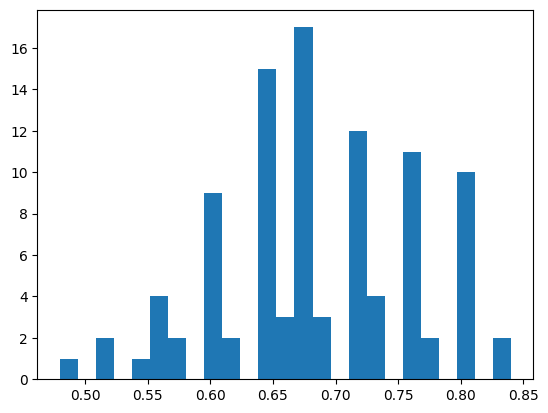

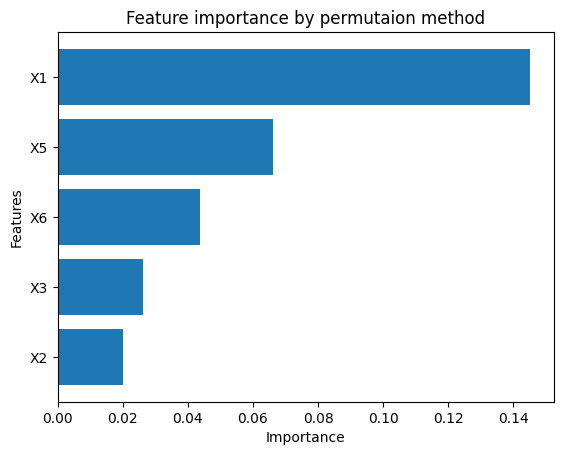

[[0.20438462 0.24792308]
 [0.06761538 0.48007692]]


In [32]:
#656
n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat5, y=tar))
pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelect", training.data_selector(force=["X1","X5","X6","above_4"])),
            ("DT", DecisionTreeClassifier(max_depth=3))
        ])
training.show_result(splits=splits,pipe=pipe,feat=feat5,tar=tar)

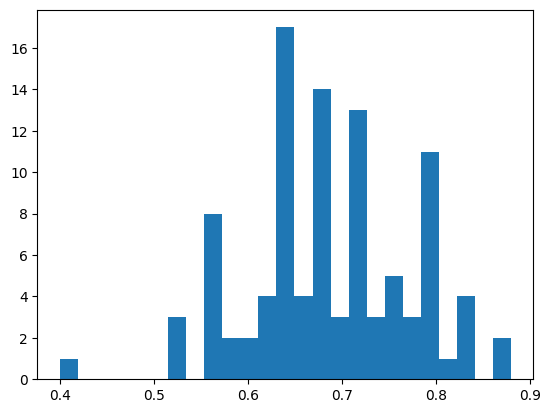

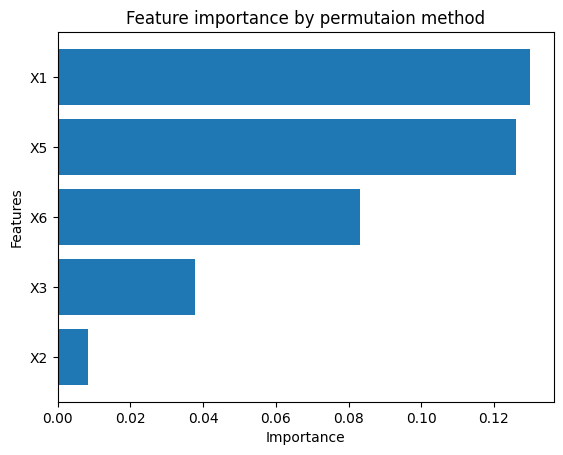

[[0.30163077 0.15067692]
 [0.16196923 0.38572308]]


In [33]:
#155
n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat5, y=tar))
pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelect", training.data_selector(force=["X5","above_5"])),
            ("DT", DecisionTreeClassifier(max_depth=6))
        ])
training.show_result(splits=splits,pipe=pipe,feat=feat5,tar=tar)

Definitely letting X2 go. 

## With 4 raw features (removing X4 X2) 

In [42]:
df=pd.read_csv("../data/raw.csv")
features=[feature for feature in list(df.columns)[1:] if feature not in ["X4", "X2"]]
target=["Y"]
feat4=df[features]
tar=df[target]
# x_t, x_v, y_t, y_v= train_test_split(feat,tar, test_size=0.2, random_state=0, stratify=tar["Y"])
n_splits=5

eva_pipe=Pipeline([("DataCreater", training.data_creator()),("DataSelector",training.data_selector())])
tar_arr=np.ravel(tar.values)
eva_pipe.fit(X=feat4,y=tar)
eva_out=eva_pipe.transform(X=feat4)
eva_out.columns

Index(['X1', 'X3', 'X5', 'X6', 'mean', 'F_w_mean', 'above_3', 'above_4',
       'above_5'],
      dtype='object')

In [43]:
eva_pipe["DataSelector"].sel_

,features,f score,p value,X1,X3,X5,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.283358,0.432772,0.411873,0.714267,0.838825,0.367825,0.580152,0.683732,0.280160
1,X3,2.886959,0.091807,0.283358,1.000000,0.358397,0.203750,0.679422,0.527503,0.590444,0.632243,0.462141,0.150838
2,X5,6.582716,0.011488,0.432772,0.358397,1.000000,0.320195,0.788594,0.805157,0.651425,0.684307,0.617076,0.224522
3,X6,3.586849,0.060568,0.411873,0.203750,0.320195,1.000000,0.637932,0.573621,0.319799,0.546312,0.587815,0.167669
4,mean,11.142964,0.001114,0.714267,0.679422,0.788594,0.637932,1.000000,0.966938,0.708673,0.870014,0.819870,0.287147
5,F_w_mean,12.693583,0.000522,0.838825,0.527503,0.805157,0.573621,0.966938,1.000000,0.652805,0.825032,0.824128,0.304732
6,above_3,2.818124,0.095724,0.367825,0.590444,0.651425,0.319799,0.708673,0.652805,1.000000,0.553929,0.315653,0.149070
7,above_4,11.298950,0.001031,0.580152,0.632243,0.684307,0.546312,0.870014,0.825032,0.553929,1.000000,0.571427,0.288983
8,above_5,8.032573,0.005365,0.683732,0.462141,0.617076,0.587815,0.819870,0.824128,0.315653,0.571427,1.000000,0.246653


In [44]:
eva_pipe["DataSelector"].total_

,features,f score,p value,X1,X3,X5,X6,mean,F_w_mean,above_3,above_4,above_5,Y
0,X1,10.561708,0.001486,1.000000,0.283358,0.432772,0.411873,0.714267,0.838825,0.367825,0.580152,0.683732,0.280160
1,X3,2.886959,0.091807,0.283358,1.000000,0.358397,0.203750,0.679422,0.527503,0.590444,0.632243,0.462141,0.150838
2,X5,6.582716,0.011488,0.432772,0.358397,1.000000,0.320195,0.788594,0.805157,0.651425,0.684307,0.617076,0.224522
3,X6,3.586849,0.060568,0.411873,0.203750,0.320195,1.000000,0.637932,0.573621,0.319799,0.546312,0.587815,0.167669
4,mean,11.142964,0.001114,0.714267,0.679422,0.788594,0.637932,1.000000,0.966938,0.708673,0.870014,0.819870,0.287147
5,F_w_mean,12.693583,0.000522,0.838825,0.527503,0.805157,0.573621,0.966938,1.000000,0.652805,0.825032,0.824128,0.304732
6,above_3,2.818124,0.095724,0.367825,0.590444,0.651425,0.319799,0.708673,0.652805,1.000000,0.553929,0.315653,0.149070
7,above_4,11.298950,0.001031,0.580152,0.632243,0.684307,0.546312,0.870014,0.825032,0.553929,1.000000,0.571427,0.288983
8,above_5,8.032573,0.005365,0.683732,0.462141,0.617076,0.587815,0.819870,0.824128,0.315653,0.571427,1.000000,0.246653


In [ ]:
range_max_depth=range(1,6+1) 
range_feat4_combin = training.all_combin(eva_out.columns)

n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat4, y=tar))

pipe = Pipeline([
            ("DataCreate", training.data_creator()),
            ("DataSelector", training.data_selector()),
            ("DT", DecisionTreeClassifier())
        ])

jobs4 = list(itertools.product(range_feat4_combin, range_max_depth))

In [46]:
results = Parallel(n_jobs=-1, backend="loky", verbose=10)(
    delayed(training.evaluate_combo)(
        list_f_sel_tuple=feat_sel, 
        dict_param={"DT__max_depth": max_depth}, 
        splits=splits, 
        pipe=pipe, 
        feat=feat4, 
        tar=tar 
    )
    for feat_sel, max_depth in jobs4
)

list_feat      = [r["features"] for r in results]
list_max_depth  = [r["DT__max_depth"] for r in results] 
list_acc_mean  = [r["acc_mean"] for r in results]
list_acc_std   = [r["acc_std"] for r in results]
list_f1_mean   = [r["f1_mean"] for r in results]
list_f1_std    = [r["f1_std"] for r in results]
list_above_73  = [r["above_73"] for r in results]
list_norm_above_73 = [r["norm_above_73"] for r in results] 
list_acc_mean_above_73 = [r["acc_mean_above_73"] for r in results]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

In [47]:
df_results = pd.DataFrame({
    #Hyper-parameters
    "features": list_feat,
    "max_depth": list_max_depth,
    #Performances
    "acc_mean": list_acc_mean,
    "acc_std": list_acc_std,
    "f1_mean": list_f1_mean,
    "f1_std": list_f1_std,
    "above_73": list_above_73,
    "norm_above_73": list_norm_above_73, 
    "acc_mean_above_73": list_acc_mean_above_73
})

In [48]:
df_results.to_csv("../data/DT_results_exhaust_raw4X42.csv", index=False)

In [49]:
df_results.sort_values(by=["acc_mean_above_73"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
365,"X1,X6,above_3",6,0.687892,0.084398,0.720349,0.082676,0.29,0.308919,3.031996e-07
179,"X5,above_5",6,0.684477,0.089124,0.710085,0.083279,0.27,0.304752,1.629527e-07
371,"X1,X6,above_4",6,0.668754,0.099409,0.709744,0.100338,0.26,0.268914,3.613830e-10
363,"X1,X6,above_3",4,0.674123,0.089644,0.701350,0.091491,0.25,0.266538,2.285477e-10
364,"X1,X6,above_3",5,0.679492,0.079420,0.710606,0.078821,0.25,0.262402,1.011504e-10
...,...,...,...,...,...,...,...,...,...
1033,"X1,X6,above_3,above_4",2,0.632092,0.086276,0.622230,0.097191,0.16,0.128226,0.000000e+00
1034,"X1,X6,above_3,above_4",3,0.609092,0.077937,0.645079,0.101412,0.05,0.060410,0.000000e+00
1036,"X1,X6,above_3,above_4",5,0.642385,0.088820,0.677499,0.088605,0.17,0.161958,0.000000e+00
1037,"X1,X6,above_3,above_4",6,0.654215,0.077391,0.691668,0.079075,0.13,0.163729,0.000000e+00


In [50]:
df_results.sort_values(by=["f1_mean"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
365,"X1,X6,above_3",6,0.687892,0.084398,0.720349,0.082676,0.29,0.308919,3.031996e-07
70,"X1,X6",5,0.655185,0.082393,0.719560,0.082094,0.18,0.181930,0.000000e+00
71,"X1,X6",6,0.655185,0.082393,0.719560,0.082094,0.18,0.181930,0.000000e+00
364,"X1,X6,above_3",5,0.679492,0.079420,0.710606,0.078821,0.25,0.262402,1.011504e-10
179,"X5,above_5",6,0.684477,0.089124,0.710085,0.083279,0.27,0.304752,1.629527e-07
...,...,...,...,...,...,...,...,...,...
258,"above_3,above_5",1,0.562892,0.068166,0.425411,0.145024,0.00,0.007113,0.000000e+00
1188,"X3,X5,above_3,above_5",1,0.556954,0.071117,0.424623,0.144721,0.00,0.007482,0.000000e+00
468,"X3,X5,above_5",1,0.556954,0.071117,0.424623,0.144721,0.00,0.007482,0.000000e+00
138,"X3,above_5",1,0.559354,0.068429,0.423706,0.144742,0.00,0.006319,0.000000e+00


In [51]:
df_results.sort_values(by=["acc_mean"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
365,"X1,X6,above_3",6,0.687892,0.084398,0.720349,0.082676,0.29,0.308919,3.031996e-07
179,"X5,above_5",6,0.684477,0.089124,0.710085,0.083279,0.27,0.304752,1.629527e-07
364,"X1,X6,above_3",5,0.679492,0.079420,0.710606,0.078821,0.25,0.262402,1.011504e-10
363,"X1,X6,above_3",4,0.674123,0.089644,0.701350,0.091491,0.25,0.266538,2.285477e-10
299,"X1,X3,above_3",6,0.670815,0.088209,0.694040,0.088569,0.24,0.251124,9.760637e-12
...,...,...,...,...,...,...,...,...,...
221,"mean,above_3",6,0.495031,0.077480,0.539163,0.105069,0.00,0.001212,0.000000e+00
128,"X3,above_3",3,0.485554,0.070858,0.526561,0.094936,0.00,0.000281,0.000000e+00
129,"X3,above_3",4,0.483969,0.074556,0.519951,0.092812,0.00,0.000484,0.000000e+00
130,"X3,above_3",5,0.482800,0.074741,0.522814,0.092186,0.00,0.000471,0.000000e+00


The improvement stopped, I will stop chasing after the removing X4 X2 route. 

## Result (Best for Decision Tree): Using raw features X1 X3 X4 X6, max_depth 6, and forced manufactured features X1 X6 mean. See detail at 203 in "With 4 raw features (removing X5 X2)". 

In [3]:
df_best=pd.read_csv("../data/DT_results_exhaust_raw4X52.csv")
df_best.sort_values(by=["acc_mean_above_73"],ascending=False)

,features,max_depth,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
203,"X1,X6,mean",6,0.719800,0.084761,0.740208,0.092712,0.43,0.452108,0.114414
455,"X1,X6,mean,above_5",6,0.701508,0.085151,0.724863,0.090785,0.33,0.368960,0.000410
239,"X1,mean,above_5",6,0.701508,0.083240,0.712756,0.097041,0.35,0.366066,0.000310
215,"X1,X6,above_4",6,0.703000,0.077468,0.733803,0.073929,0.34,0.363721,0.000246
449,"X1,X6,mean,above_4",6,0.699508,0.087063,0.721549,0.091568,0.32,0.363082,0.000231
...,...,...,...,...,...,...,...,...,...
273,"X3,X6,above_4",4,0.570200,0.076115,0.631404,0.081747,0.01,0.017889,0.000000
274,"X3,X6,above_4",5,0.578523,0.071258,0.626708,0.081371,0.01,0.016762,0.000000
275,"X3,X6,above_4",6,0.602785,0.087924,0.641500,0.087927,0.11,0.073966,0.000000
276,"X3,X6,above_5",1,0.532031,0.053659,0.651049,0.098904,0.00,0.000112,0.000000
